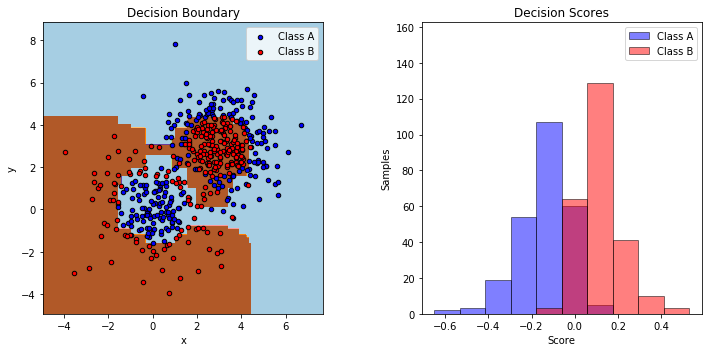

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

##Problem-1: Compare the performance of two different classification methods

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)

df_names = pd.read_csv("./df_names.csv", header=None)
df_names_lst = []
for i in range(len(df_names)):
    word = df_names.loc[i]
    words = word[0].split(":")
    df_names_lst.append(words[0])

df_names_lst.append("target")
df.columns = df_names_lst

print(df.shape)
df.head(5)

(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [117]:
#Check Null values
df.isnull().sum().sum() # No Null Values in the dataset

0

In [118]:
#Assign the data
Y = df.loc[:,"target"]
X= df.loc[:, :"capital_run_length_total"]
X.head()    

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [119]:
#Normalizing the X data variables 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) #Normalize the X train variables in range (0,1)
X_norm = min_max_scaler.fit_transform(X)
X_norm[0]

array([ 0.        ,  0.04481793,  0.1254902 ,  0.        ,  0.032     ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.06618407,  0.        ,  0.        ,  0.        ,
        0.016     ,  0.        ,  0.14191419,  0.10293333,  0.        ,
        0.08640864,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02395468,  0.        ,  0.        ,  0.00250204,
        0.00600721,  0.01748737])

In [3]:
from sklearn.datasets import make_gaussian_quantiles
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=1)

In [2]:
X1.shape

(500, 2)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm

##Problem-1-a: Non-linear classification methods such as SVM

# Tuning Non-Linear SVM parameters for accuracy

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1}

Grid scores on development set:

0.597 (+/-0.111) for {'C': 1e-05, 'gamma': 1e-05}
0.588 (+/-0.080) for {'C': 1e-05, 'gamma': 0.0001}
0.573 (+/-0.075) for {'C': 1e-05, 'gamma': 0.001}
0.545 (+/-0.069) for {'C': 1e-05, 'gamma': 0.01}
0.755 (+/-0.114) for {'C': 1e-05, 'gamma': 0.1}
0.852 (+/-0.035) for {'C': 1e-05, 'gamma': 1}
0.852 (+/-0.035) for {'C': 1e-05, 'gamma': 1}
0.839 (+/-0.124) for {'C': 1e-05, 'gamma': 10}
0.597 (+/-0.111) for {'C': 0.0001, 'gamma': 1e-05}
0.588 (+/-0.080) for {'C': 0.0001, 'gamma': 0.0001}
0.573 (+/-0.075) for {'C': 0.0001, 'gamma': 0.001}
0.545 (+/-0.069) for {'C': 0.0001, 'gamma': 0.01}
0.755 (+/-0.114) for {'C': 0.0001, 'gamma': 0.1}
0.852 (+/-0.035) for {'C': 0.0001, 'gamma': 1}
0.852 (+/-0.035) for {'C': 0.0001, 'gamma': 1}
0.839 (+/-0.124) for {'C': 0.0001, 'gamma': 10}
0.597 (+/-0.111) for {'C': 0.001, 'gamma': 1e-05}
0.588 (+/-0.08

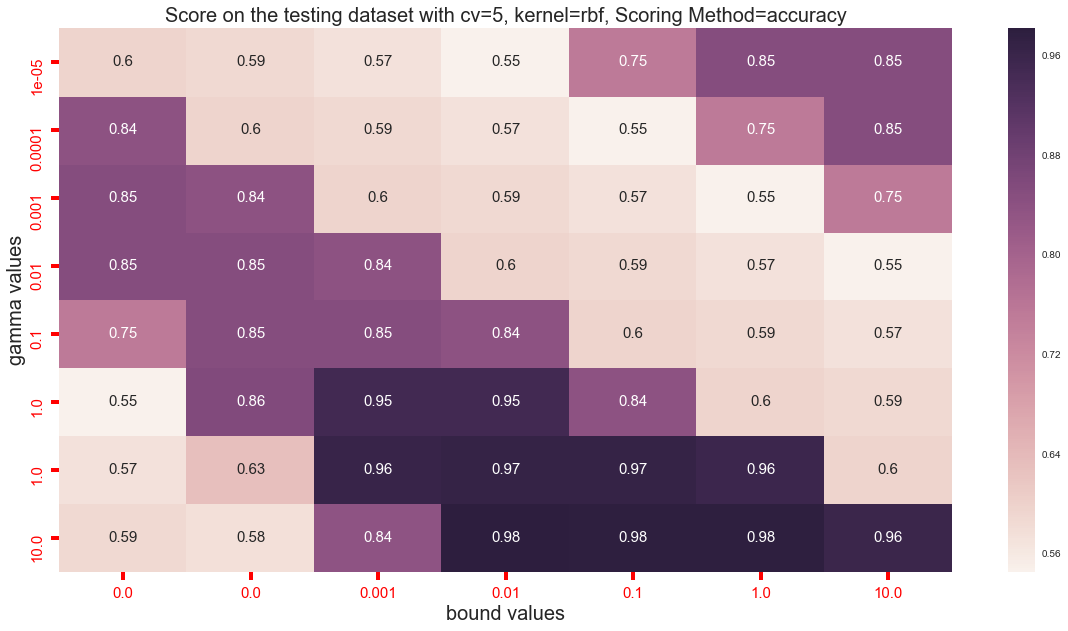

# Tuning Non-Linear SVM parameters for precision

Best parameters set found on development set:

{'C': 1e-05, 'gamma': 0.01}

Grid scores on development set:

0.918 (+/-0.329) for {'C': 1e-05, 'gamma': 1e-05}
0.918 (+/-0.329) for {'C': 1e-05, 'gamma': 0.0001}
0.964 (+/-0.145) for {'C': 1e-05, 'gamma': 0.001}
1.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.01}
1.000 (+/-0.000) for {'C': 1e-05, 'gamma': 0.1}
0.772 (+/-0.042) for {'C': 1e-05, 'gamma': 1}
0.772 (+/-0.042) for {'C': 1e-05, 'gamma': 1}
0.767 (+/-0.143) for {'C': 1e-05, 'gamma': 10}
0.918 (+/-0.329) for {'C': 0.0001, 'gamma': 1e-05}
0.918 (+/-0.329) for {'C': 0.0001, 'gamma': 0.0001}
0.964 (+/-0.145) for {'C': 0.0001, 'gamma': 0.001}
1.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.01}
1.000 (+/-0.000) for {'C': 0.0001, 'gamma': 0.1}
0.772 (+/-0.042) for {'C': 0.0001, 'gamma': 1}
0.772 (+/-0.042) for {'C': 0.0001, 'gamma': 1}
0.767 (+/-0.143) for {'C': 0.0001, 'gamma': 10}
0.918 (+/-0.329) for {'C': 0.001, 'gamma': 1e-05}
0.918 (+/

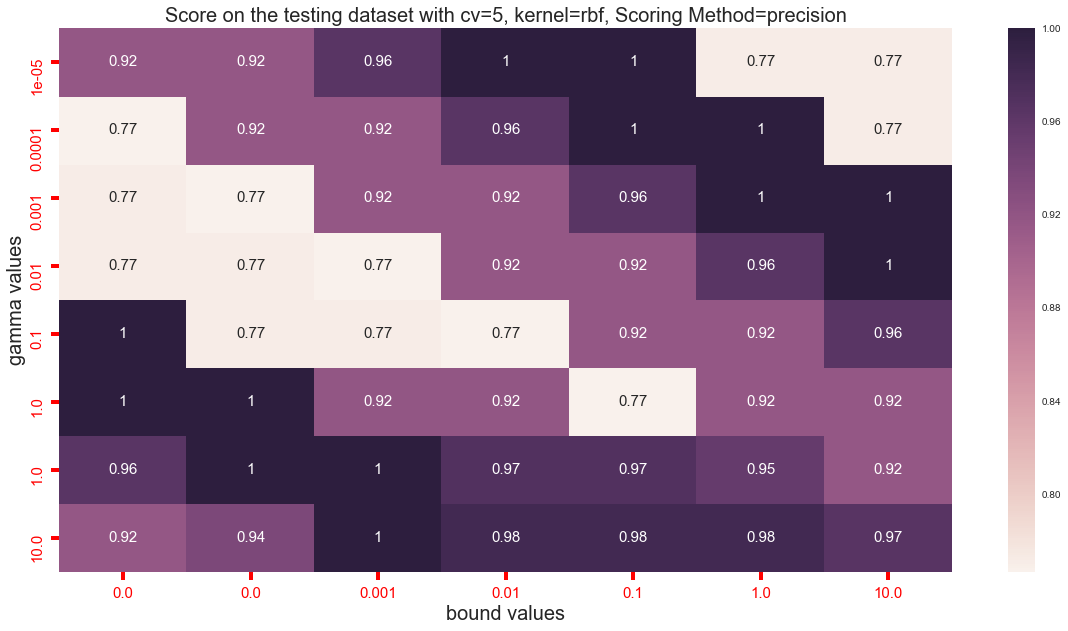

# Tuning Non-Linear SVM parameters for recall

Best parameters set found on development set:

{'C': 1e-05, 'gamma': 1}

Grid scores on development set:

0.236 (+/-0.208) for {'C': 1e-05, 'gamma': 1e-05}
0.218 (+/-0.160) for {'C': 1e-05, 'gamma': 0.0001}
0.158 (+/-0.177) for {'C': 1e-05, 'gamma': 0.001}
0.091 (+/-0.138) for {'C': 1e-05, 'gamma': 0.01}
0.509 (+/-0.228) for {'C': 1e-05, 'gamma': 0.1}
1.000 (+/-0.000) for {'C': 1e-05, 'gamma': 1}
1.000 (+/-0.000) for {'C': 1e-05, 'gamma': 1}
0.994 (+/-0.024) for {'C': 1e-05, 'gamma': 10}
0.236 (+/-0.208) for {'C': 0.0001, 'gamma': 1e-05}
0.218 (+/-0.160) for {'C': 0.0001, 'gamma': 0.0001}
0.158 (+/-0.177) for {'C': 0.0001, 'gamma': 0.001}
0.091 (+/-0.138) for {'C': 0.0001, 'gamma': 0.01}
0.509 (+/-0.228) for {'C': 0.0001, 'gamma': 0.1}
1.000 (+/-0.000) for {'C': 0.0001, 'gamma': 1}
1.000 (+/-0.000) for {'C': 0.0001, 'gamma': 1}
0.994 (+/-0.024) for {'C': 0.0001, 'gamma': 10}
0.236 (+/-0.208) for {'C': 0.001, 'gamma': 1e-05}
0.218 (+/-0.160

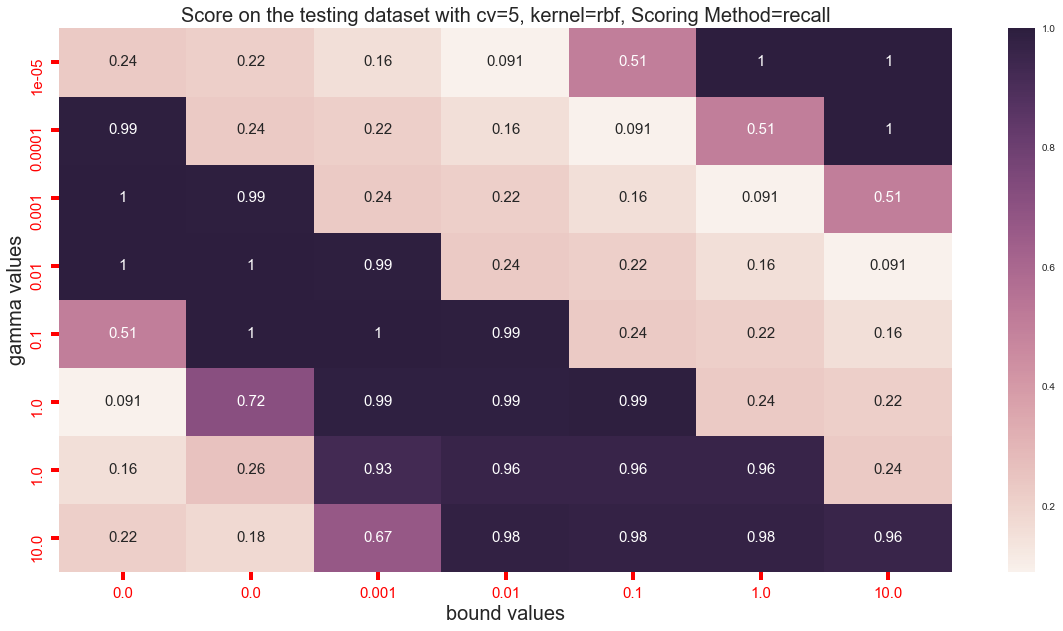

In [175]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X1), 
                                                 #Predictor Variables
                                                 np.array(Y1), 
                                                 #Class labels
                                                 stratify = np.array(Y1), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )



#Pre-set parameters for the classifier
#kernel_lst = ("rbf")
C_lst = [0.00001,0.0001,0.001,0.01,0.1,1,10]
gamma_lst =[0.00001,0.0001,0.001,0.01,0.1,1,1,10]
tuned_parameters = [{'C':C_lst,
                     'gamma': gamma_lst}]


scores = ['accuracy','precision','recall']

for score in scores:
    print("# Tuning Non-Linear SVM parameters for %s" % score)
    print()
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(svm.SVC(kernel='rbf'), tuned_parameters, cv=5, scoring='%s' % score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()
    
    row_lst = gamma_lst 
    col_lst =C_lst
    heat_result = np.zeros((len(row_lst),len(col_lst)))
    count=0
    for i in range(len(row_lst)):
        a_lst=[]
        for j in range(len(col_lst)):
            a_lst.append(means[count])
            count+=1
        heat_result[i]=a_lst

    heat_result_df = pd.DataFrame(heat_result, columns=np.round(col_lst,decimals=3), index = row_lst)
    import seaborn as sns
    plt.figure(figsize = (20,10))
    sns.heatmap(heat_result_df, annot=True, annot_kws={"size": 15},)
    plt.title("Score on the testing dataset with cv=5, kernel=rbf, Scoring Method=%s"%(score), size=20)
    plt.ylabel("gamma values", size=20)
    plt.xlabel("bound values", size=20)
    plt.tick_params(direction='out', length=8, width=4, colors='r', labelsize=15)
    plt.show()

# Tuning Non-Linear NuSVM parameters for accuracy

Best parameters set found on development set:

{'gamma': 10, 'nu': 0.29999999999999999}

Grid scores on development set:

0.337 (+/-0.495) for {'gamma': 1e-05, 'nu': 0.29999999999999999}
0.783 (+/-0.082) for {'gamma': 1e-05, 'nu': 0.3342857142857143}
0.795 (+/-0.081) for {'gamma': 1e-05, 'nu': 0.36857142857142855}
0.807 (+/-0.025) for {'gamma': 1e-05, 'nu': 0.40285714285714286}
0.836 (+/-0.054) for {'gamma': 1e-05, 'nu': 0.43714285714285717}
0.836 (+/-0.049) for {'gamma': 1e-05, 'nu': 0.47142857142857142}
0.736 (+/-0.241) for {'gamma': 1e-05, 'nu': 0.50571428571428578}
0.824 (+/-0.023) for {'gamma': 1e-05, 'nu': 0.54000000000000004}
0.834 (+/-0.092) for {'gamma': 1e-05, 'nu': 0.57428571428571429}
0.853 (+/-0.059) for {'gamma': 1e-05, 'nu': 0.60857142857142854}
0.852 (+/-0.064) for {'gamma': 1e-05, 'nu': 0.64285714285714279}
0.837 (+/-0.075) for {'gamma': 1e-05, 'nu': 0.67714285714285716}
0.849 (+/-0.050) for {'gamma': 1e-05, 'nu': 0.71

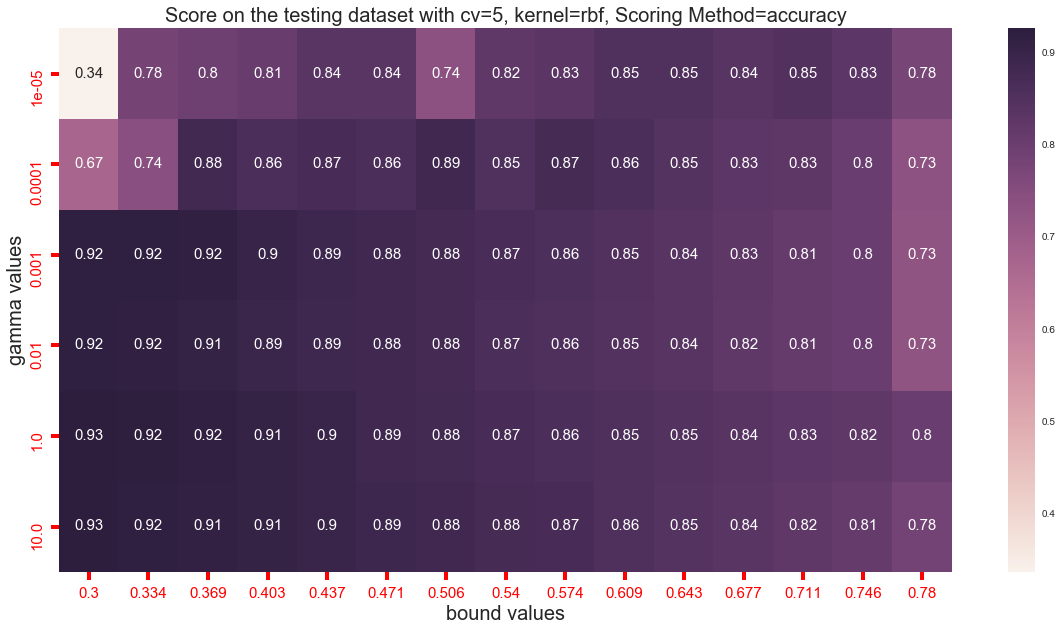

# Tuning Non-Linear NuSVM parameters for precision

Best parameters set found on development set:

{'gamma': 10, 'nu': 0.29999999999999999}

Grid scores on development set:

0.350 (+/-0.469) for {'gamma': 1e-05, 'nu': 0.29999999999999999}
0.842 (+/-0.243) for {'gamma': 1e-05, 'nu': 0.3342857142857143}
0.707 (+/-0.192) for {'gamma': 1e-05, 'nu': 0.36857142857142855}
0.814 (+/-0.205) for {'gamma': 1e-05, 'nu': 0.40285714285714286}
0.866 (+/-0.117) for {'gamma': 1e-05, 'nu': 0.43714285714285717}
0.799 (+/-0.120) for {'gamma': 1e-05, 'nu': 0.47142857142857142}
0.708 (+/-0.370) for {'gamma': 1e-05, 'nu': 0.50571428571428578}
0.869 (+/-0.146) for {'gamma': 1e-05, 'nu': 0.54000000000000004}
0.818 (+/-0.179) for {'gamma': 1e-05, 'nu': 0.57428571428571429}
0.822 (+/-0.027) for {'gamma': 1e-05, 'nu': 0.60857142857142854}
0.833 (+/-0.113) for {'gamma': 1e-05, 'nu': 0.64285714285714279}
0.814 (+/-0.141) for {'gamma': 1e-05, 'nu': 0.67714285714285716}
0.813 (+/-0.132) for {'gamma': 1e-05, 'nu': 0.7

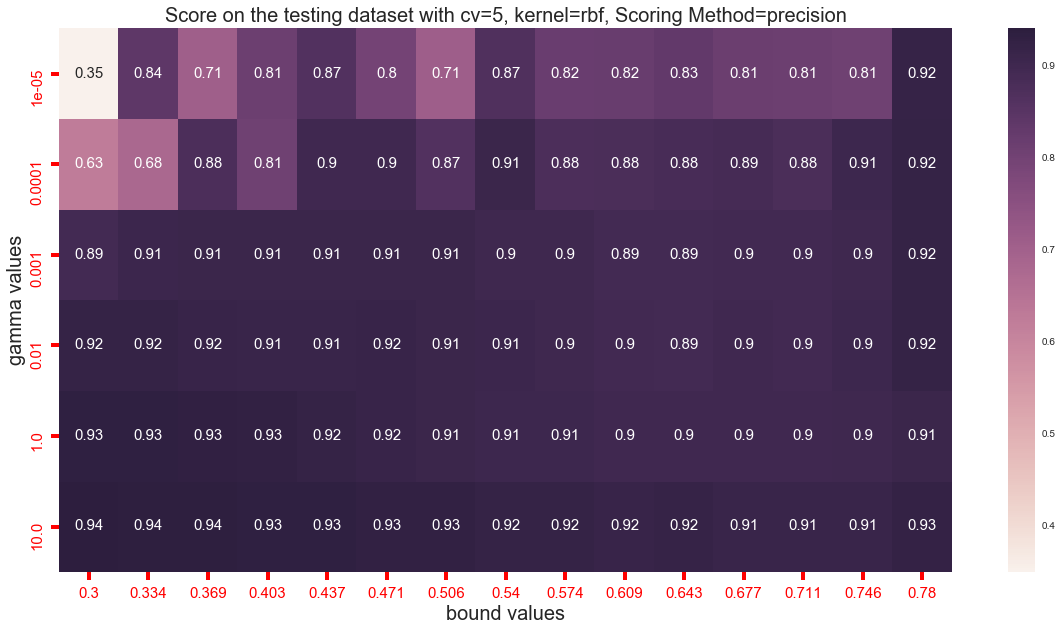

# Tuning Non-Linear NuSVM parameters for recall

Best parameters set found on development set:

{'gamma': 0.0001, 'nu': 0.40285714285714286}

Grid scores on development set:

0.522 (+/-0.413) for {'gamma': 1e-05, 'nu': 0.29999999999999999}
0.621 (+/-0.400) for {'gamma': 1e-05, 'nu': 0.3342857142857143}
0.876 (+/-0.160) for {'gamma': 1e-05, 'nu': 0.36857142857142855}
0.712 (+/-0.296) for {'gamma': 1e-05, 'nu': 0.40285714285714286}
0.702 (+/-0.220) for {'gamma': 1e-05, 'nu': 0.43714285714285717}
0.798 (+/-0.237) for {'gamma': 1e-05, 'nu': 0.47142857142857142}
0.828 (+/-0.347) for {'gamma': 1e-05, 'nu': 0.50571428571428578}
0.671 (+/-0.192) for {'gamma': 1e-05, 'nu': 0.54000000000000004}
0.776 (+/-0.295) for {'gamma': 1e-05, 'nu': 0.57428571428571429}
0.800 (+/-0.185) for {'gamma': 1e-05, 'nu': 0.60857142857142854}
0.795 (+/-0.217) for {'gamma': 1e-05, 'nu': 0.64285714285714279}
0.778 (+/-0.221) for {'gamma': 1e-05, 'nu': 0.67714285714285716}
0.818 (+/-0.112) for {'gamma': 1e-05, 'nu': 0.

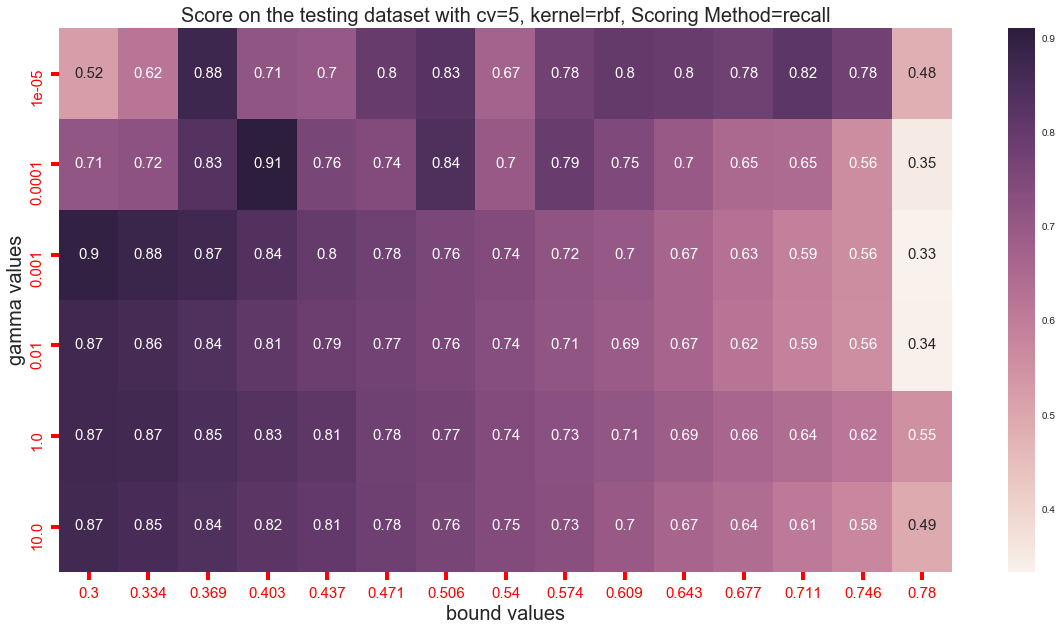

In [176]:
from sklearn.svm import NuSVC

#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )



#Pre-set parameters for the classifier
#kernel_lst = ["rbf","poly"]
nu_lst = list(np.linspace(0.3,0.78,15))
gamma_lst = [0.00001,0.0001,0.001,0.01,1,10]
tuned_parameters = [{'gamma': gamma_lst,
                     "nu": nu_lst
                    }]


scores = ['accuracy','precision','recall']

for score in scores:
    print("# Tuning Non-Linear NuSVM parameters for %s" % score)
    print()
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(NuSVC(kernel='rbf'), tuned_parameters, cv=5, scoring='%s' % score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()
    
    row_lst = gamma_lst 
    col_lst =nu_lst
    
    heat_result = np.zeros((len(row_lst),len(col_lst)))
    count=0
    for i in range(len(row_lst)):
        a_lst=[]
        for j in range(len(col_lst)):
            a_lst.append(means[count])
            count+=1
        heat_result[i]=a_lst

    heat_result_df = pd.DataFrame(heat_result, columns=np.round(col_lst,decimals=3), index = row_lst)
    import seaborn as sns
    plt.figure(figsize = (20,10))
    sns.heatmap(heat_result_df, annot=True, annot_kws={"size": 15},)
    plt.title("Score on the testing dataset with cv=5, kernel=rbf, Scoring Method=%s"%(score), size=20)
    plt.ylabel("gamma values", size=20)
    plt.xlabel("bound values", size=20)
    plt.tick_params(direction='out', length=8, width=4, colors='r', labelsize=15)
    plt.show()

The following shows different measuring metrics on different combination of 

##Problem-1-b: AdaBoost

In [198]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [202]:
from sklearn.svm import NuSVC

#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(np.array(X_norm), 
                                                 #Predictor Variables
                                                 np.array(Y), 
                                                 #Class labels
                                                 stratify = np.array(Y), 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=18
                                                 # Set the randon state for spliting data  in same order
                                                )



#Pre-set parameters for the classifier

n_estimators_lst = [100,105,110,115,120,125]
tuned_parameters = [{"n_estimators" : n_estimators_lst}]

DecisionTreeClassifier()


scores = ['accuracy','precision','recall']

for score in scores:
    print("# Tuning AdaBoost parameters for %s" % score)
    print()
    #Find the best parameters value to the classifier by cross-validation method
    clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,criterion ='gini')), 
                       tuned_parameters, cv=5, scoring='%s'% score)
 
    clf.fit(x_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()
    

# Tuning AdaBoost parameters for accuracy

Best parameters set found on development set:

{'n_estimators': 100}

Grid scores on development set:

0.942 (+/-0.019) for {'n_estimators': 100}
0.941 (+/-0.017) for {'n_estimators': 105}
0.942 (+/-0.017) for {'n_estimators': 110}
0.941 (+/-0.016) for {'n_estimators': 115}
0.940 (+/-0.015) for {'n_estimators': 120}
0.942 (+/-0.014) for {'n_estimators': 125}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.95      0.95      0.95       948
          1       0.93      0.93      0.93       617

avg / total       0.94      0.94      0.94      1565


# Tuning AdaBoost parameters for precision

Best parameters set found on development set:

{'n_estimators': 100}

Grid scores on development set:

0.928 (+/-0.026) for {'n_estimators': 100}
0.924 (+/-0.025) for {'n_estimators': 105}
0.927 (+/-

##Problem-1-c:Evaluate and discuss which method is more reliable

Ans:

Based on the following, there is ZERO missing value. However, 394 duplicated data records. 

Outliners???

In [197]:
X_arr = np.array(X)
arr , ind, ct = np.unique(X_arr, axis=0, return_index=True,return_counts=True)
print("The orginal number of instance is",X.shape[0])
print("The duplicated number of instance is",X.shape[0]-arr.shape[0])
print("The is",X.isnull().sum().sum(),"missing values")

The orginal number of instance is 4601
The duplicated number of instance is 394
The is 0 missing values
